WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 589
['neiafu', 'bengkulu', 'talnakh', 'bethel', 'san patricio', 'martinsburg', 'kone', 'olonkinbyen', 'albany', 'west island', 'san felipe', 'ribeira grande', 'wladyslawowo', 'iqaluit', 'edinburgh of the seven seas', 'adamstown', 'la sarre', 'iskushuban', 'yellowknife', 'sturgis', 'puerto natales', 'port-aux-francais', 'vorgashor', 'nabire', 'mermoz boabab', 'carnarvon', 'utrik', 'stanley', 'port mathurin', 'badiyah', 'gorno-altaysk', 'papatowai', 'blackmans bay', 'ulsteinvik', 'taiohae', 'nova sintra', 'zhosaly', 'uturoa', 'kingston', 'malanje', 'mount isa', 'grytviken', 'broken hill', 'puerto ayora', 'invercargill', 'port blair', 'moramanga', 'hermanus', 'burao', 'constantia', 'tateyama', 'ketchikan', 'waitangi', 'badger', 'jamestown', 'dubinino', 'al jawf', 'fortuna', 'thompson', 'port elizabeth', 'inari', 'avarua', 'iskateley', 'akureyri', 'wailua homesteads', 'saipan', 'bilibino', 'kill devil hills', 'ust-nera', 'teguise', 'auki', 'mhamid', 'smithers'

Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric" + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ['coord']['lat']
        city_lng = city_weather ['coord']['lon']
        city_max_temp = city_weather ['main']['temp_max']
        city_humidity = city_weather ['main']['humidity']
        city_clouds = city_weather ['clouds']['all']
        city_wind = city_weather ['wind']['speed']
        city_country = city_weather ['sys']['country']
        city_date = city_weather ['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | neiafu
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | martinsburg
Processing Record 7 of Set 1 | kone
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | san felipe
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | wladyslawowo
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | la sarre
Processing Record 18 of Set 1 | iskushuban
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | sturgis
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | port-aux-fran

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,neiafu,-18.6500,-173.9833,30.38,84,40,5.66,TO,1715044179
1,bengkulu,-3.8004,102.2655,25.40,92,100,1.83,ID,1715044066
2,talnakh,69.4865,88.3972,-14.33,97,96,3.08,RU,1715044179
3,bethel,41.3712,-73.4140,19.05,82,75,2.06,US,1715043941
4,san patricio,28.0170,-97.5169,27.40,80,0,6.22,US,1715044179


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/kristin/Documents/Module_6_Assignment/Module_6_VacationPy_WeatherPy/output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,neiafu,-18.6500,-173.9833,30.38,84,40,5.66,TO,1715044179
1,bengkulu,-3.8004,102.2655,25.40,92,100,1.83,ID,1715044066
2,talnakh,69.4865,88.3972,-14.33,97,96,3.08,RU,1715044179
3,bethel,41.3712,-73.4140,19.05,82,75,2.06,US,1715043941
4,san patricio,28.0170,-97.5169,27.40,80,0,6.22,US,1715044179


Create the Scatter Plots Requested

Latitude Vs. Temperature

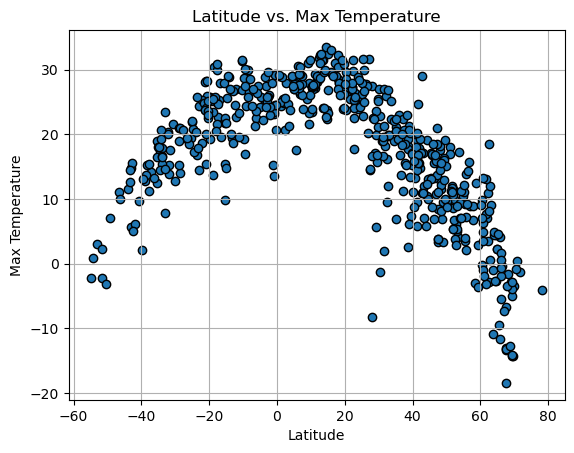

In [17]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitude Vs. Humidity

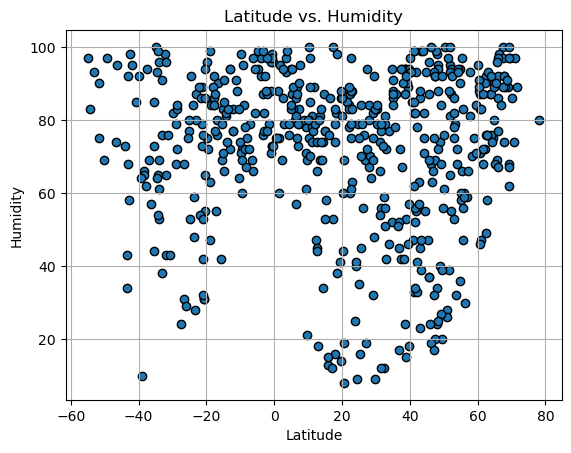

In [26]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Latitude Vs. Cloudiness

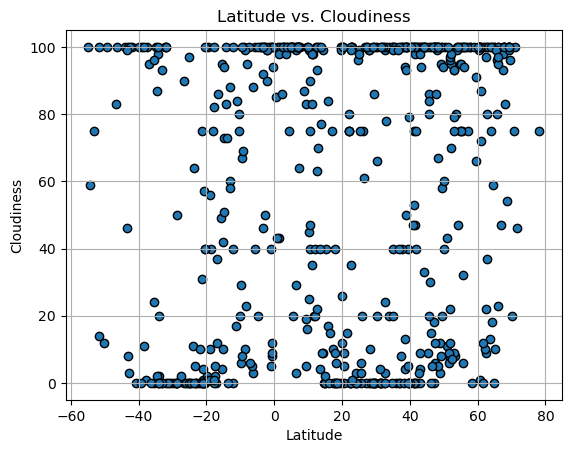

In [27]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

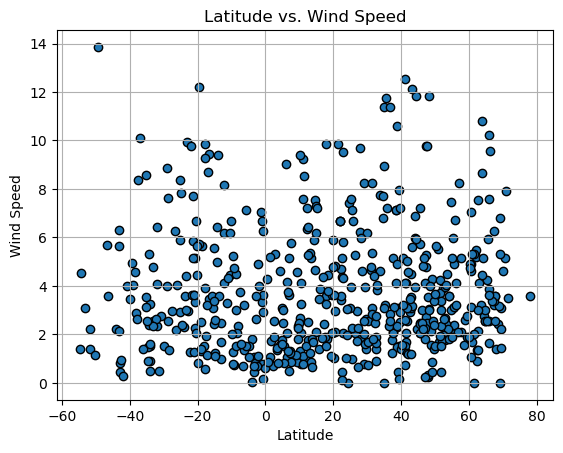

In [28]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values, y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

Requirement 2: Compute Linear Regression for Each Relationship

In [22]:
# Define a function to create Linear Regression plots


In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,talnakh,69.4865,88.3972,-14.33,97,96,3.08,RU,1715044179
3,bethel,41.3712,-73.4140,19.05,82,75,2.06,US,1715043941
4,san patricio,28.0170,-97.5169,27.40,80,0,6.22,US,1715044179
5,martinsburg,39.4562,-77.9639,20.31,93,40,1.54,US,1715043959
7,olonkinbyen,70.9221,-8.7187,0.40,97,100,7.92,SJ,1715044179


<function matplotlib.pyplot.show(close=None, block=None)>

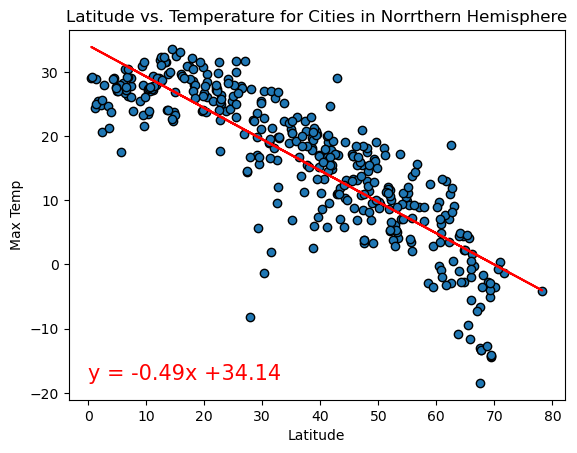

In [39]:
# Linear regression on Northern Hemisphere (Lat v. Max Temp)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#create the scatter plot from the Northern Hemi DataFrame
plt.scatter(x_values, y_values, edgecolor='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept

#define the equation
equation = 'y = ' + str(round(slope,2)) +'x +' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')

#add labels
plt.title('Latitude vs. Temperature for Cities in Norrthern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#annocate the line equation
plt.annotate(equation, (0,-18), fontsize=15, color='red')

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

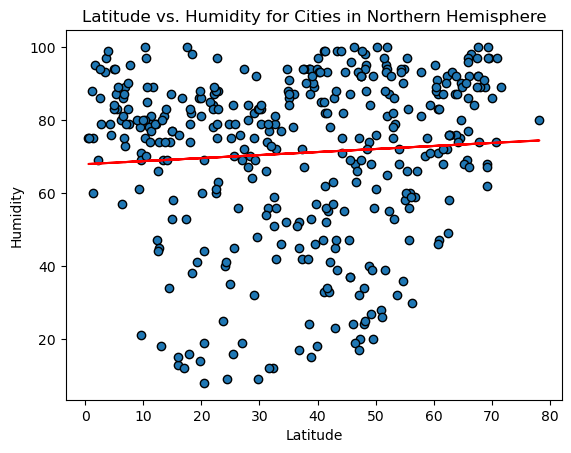

In [42]:
# Linear regression on Northern Hemisphere (Lat v. Humidity)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#create the scatter plot from the Northern Hemi DataFrame
plt.scatter(x_values, y_values, edgecolor='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept

#define the equation
equation = 'y = ' + str(round(slope,2)) +'x +' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')

#add labels
plt.title('Latitude vs. Humidity for Cities in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#annocate the line equation
plt.annotate(equation, (0,-18), fontsize=15, color='red')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

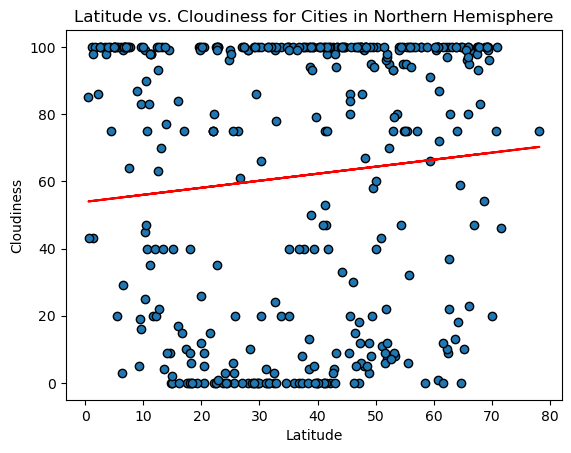

In [43]:
# Linear regression on Northern Hemisphere (Lat v. Cloudiness)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#create the scatter plot from the Northern Hemi DataFrame
plt.scatter(x_values, y_values, edgecolor='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept

#define the equation
equation = 'y = ' + str(round(slope,2)) +'x +' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')

#add labels
plt.title('Latitude vs. Cloudiness for Cities in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#annocate the line equation
plt.annotate(equation, (0,-18), fontsize=15, color='red')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

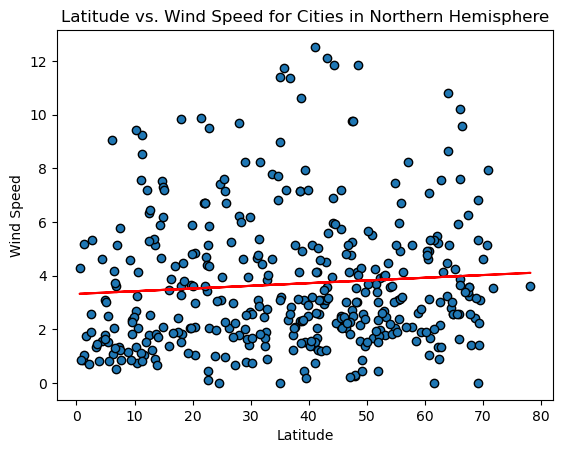

In [44]:
# Linear regression on Northern Hemisphere (Lat v. Wind Speed)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#create the scatter plot from the Northern Hemi DataFrame
plt.scatter(x_values, y_values, edgecolor='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept

#define the equation
equation = 'y = ' + str(round(slope,2)) +'x +' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')

#add labels
plt.title('Latitude vs. Wind Speed for Cities in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#annocate the line equation
plt.annotate(equation, (0,-18), fontsize=15, color='red')

plt.show

In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,neiafu,-18.6500,-173.9833,30.38,84,40,5.66,TO,1715044179
1,bengkulu,-3.8004,102.2655,25.40,92,100,1.83,ID,1715044066
6,kone,-21.0595,164.8658,28.21,42,1,3.63,NC,1715044179
9,west island,-12.1568,96.8225,26.99,83,40,6.17,CC,1715044179
14,edinburgh of the seven seas,-37.0676,-12.3116,14.17,69,95,10.12,SH,1715044180


<function matplotlib.pyplot.show(close=None, block=None)>

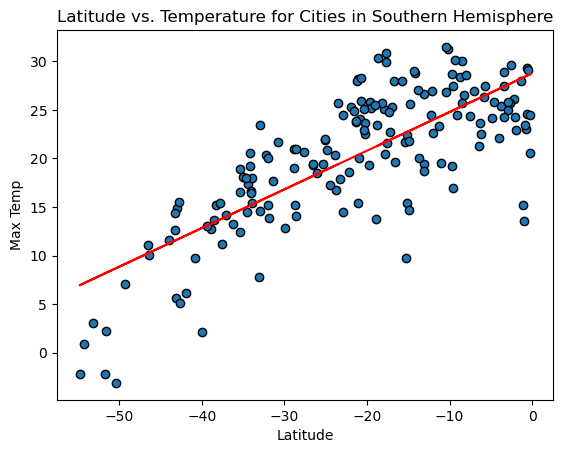

In [45]:
# Linear regression on Southern Hemisphere (Lat v. Max Temp)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#create the scatter plot from the Northern Hemi DataFrame
plt.scatter(x_values, y_values, edgecolor='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept

#define the equation
equation = 'y = ' + str(round(slope,2)) +'x +' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')

#add labels
plt.title('Latitude vs. Temperature for Cities in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#annocate the line equation
plt.annotate(equation, (0,-18), fontsize=15, color='red')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

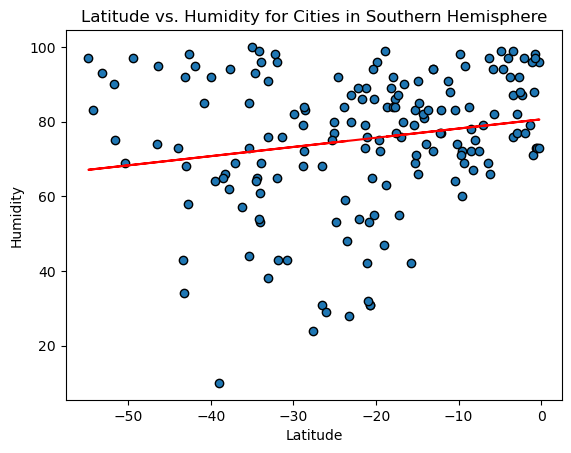

In [46]:
# Linear regression on Southern Hemisphere (Lat v. Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#create the scatter plot from the Northern Hemi DataFrame
plt.scatter(x_values, y_values, edgecolor='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept

#define the equation
equation = 'y = ' + str(round(slope,2)) +'x +' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')

#add labels
plt.title('Latitude vs. Humidity for Cities in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#annocate the line equation
plt.annotate(equation, (0,-18), fontsize=15, color='red')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

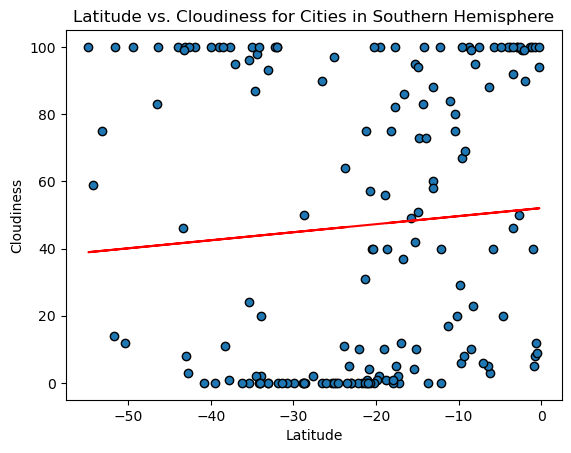

In [47]:
# Linear regression on Southern Hemisphere (Lat v. Cloudiness)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#create the scatter plot from the Southern Hemi DataFrame
plt.scatter(x_values, y_values, edgecolor='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept

#define the equation
equation = 'y = ' + str(round(slope,2)) +'x +' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')

#add labels
plt.title('Latitude vs. Cloudiness for Cities in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#annocate the line equation
plt.annotate(equation, (0,-18), fontsize=15, color='red')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

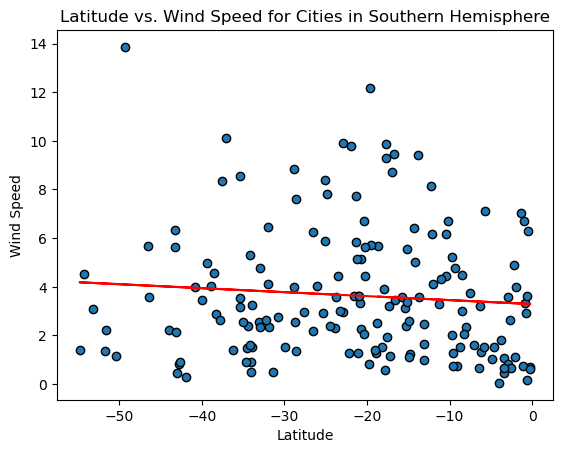

In [48]:
# Linear regression on Southern Hemisphere (Lat v. Wind Speed)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#create the scatter plot from the Southern Hemi DataFrame
plt.scatter(x_values, y_values, edgecolor='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept

#define the equation
equation = 'y = ' + str(round(slope,2)) +'x +' + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')

#add labels
plt.title('Latitude vs. Wind Speed for Cities in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#annocate the line equation
plt.annotate(equation, (0,-18), fontsize=15, color='red')

plt.show